<a href="https://colab.research.google.com/github/cypherkrish/PythonDataScience-Exercises/blob/main/02_Session_Data_Visualisation_DS_fig08.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [46]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import warnings
import datetime as dt
warnings.filterwarnings('ignore')

In [47]:
dfm = pd.read_csv('https://raw.githubusercontent.com/cypherkrish/PythonDataScience/main/Data/matchs.csv')
dfd = pd.read_csv('https://raw.githubusercontent.com/cypherkrish/PythonDataScience/main/Data/deliveris.csv')

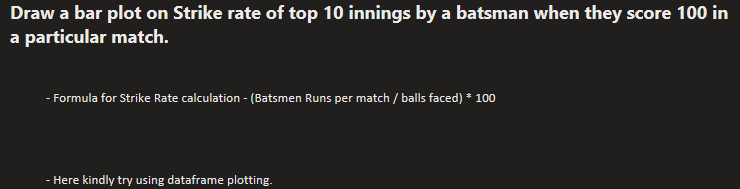

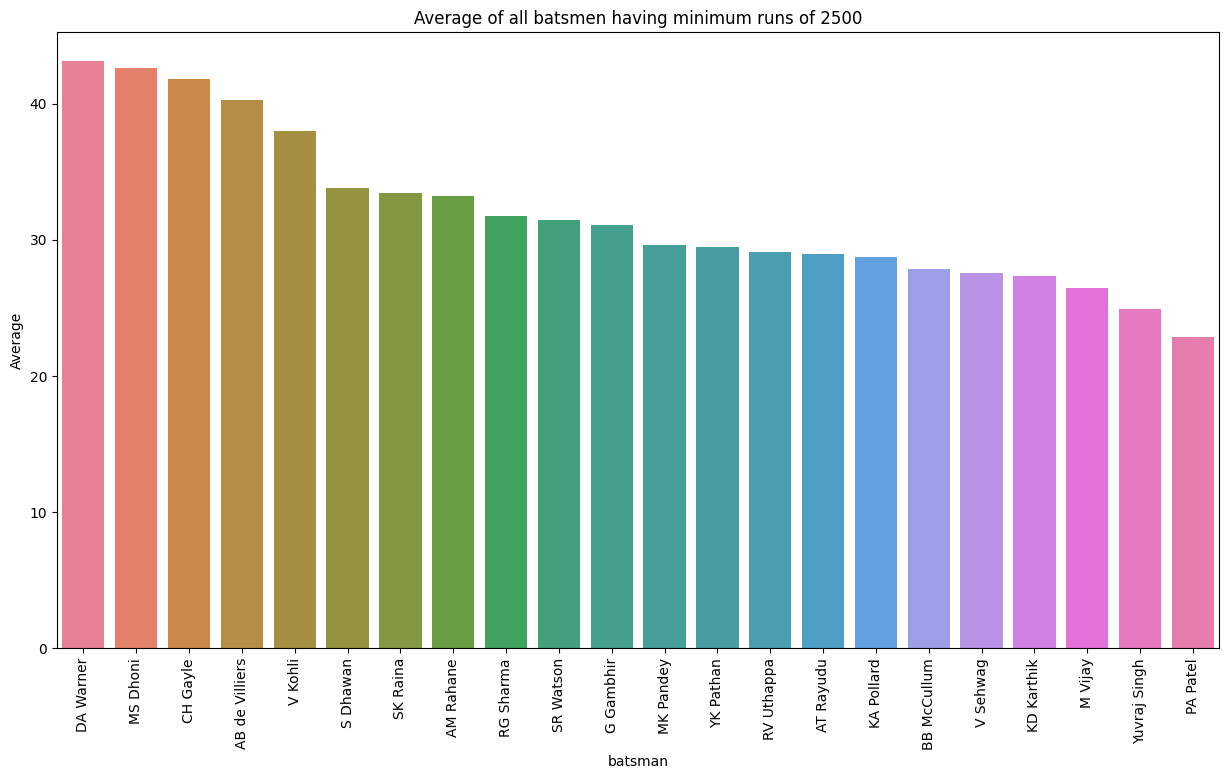

In [50]:
fig8,ax8=plt.subplots(figsize=(15,8))
###Start code here

data_ballsFaced_RunsScored = dfd.groupby(['match_id', 'batsman'])[['ball', 'batsman_runs']].agg(['size', 'sum']).reset_index()
dic = {}
balls_faced = list(data_ballsFaced_RunsScored['ball']['size'])
runs_scored = list (data_ballsFaced_RunsScored['batsman_runs']['sum'])
dic['match_id'] = list(data_ballsFaced_RunsScored['match_id'])
dic['batsman'] = list(data_ballsFaced_RunsScored['batsman'])
dic['balls_faced'] = balls_faced
dic['runs_scored'] = runs_scored
result = pd.DataFrame(dic)

result_agg = result.groupby('batsman')[['match_id', 'runs_scored']].agg(['size', 'sum']).reset_index()
dic_agg = {}
batsman = list(result_agg['batsman'])
playedmatches = list(result_agg['match_id']['size'])
total_runs_scored = list(result_agg['runs_scored']['sum'])

dic_agg['batsman'] = batsman
dic_agg['playedmatches'] = playedmatches
dic_agg['total_runs_scored'] = total_runs_scored


runs_per_match = pd.DataFrame(dic_agg)
runs_per_match['runs_per_match'] = runs_per_match['total_runs_scored'] / runs_per_match['playedmatches']


player_dismissed_count  = dfd['player_dismissed'].value_counts().reset_index()
player_dismissed_count.columns = ['batsman','player_dismissed_count']

batsman_average = pd.merge(runs_per_match, player_dismissed_count, on='batsman', how='left')
batsman_average['batsman_average'] = batsman_average['total_runs_scored']/batsman_average['player_dismissed_count']

batsman_average[batsman_average['total_runs_scored'] >= 2500].sort_values(by='batsman_average', ascending=False)



df_8 = batsman_average[batsman_average['total_runs_scored'] >= 2500].sort_values(by='batsman_average', ascending=False)

sns.barplot(data = df_8 , x = 'batsman', y='batsman_average', palette='husl')
ax8.set_title('Average of all batsmen having minimum runs of 2500') # fontsize=16)
ax8.set_ylabel('Average') #, fontsize=14)
plt.xticks(rotation=90)
plt.show()

In [25]:
runs_per_match

,batsman,playedmatches,total_runs_scored,runs_per_match
0,A Ashish Reddy,23,280,12.173913
1,A Chandila,2,4,2.000000
2,A Chopra,6,53,8.833333
3,A Choudhary,3,25,8.333333
4,A Dananjaya,1,4,4.000000
...,...,...,...,...
511,YV Takawale,10,192,19.200000
512,Yashpal Singh,4,47,11.750000
513,Younis Khan,1,3,3.000000
514,Yuvraj Singh,126,2765,21.944444


In [30]:
player_dismissed_count

,batsman,player_dismissed_count
0,SK Raina,162
1,RG Sharma,155
2,RV Uthappa,153
3,V Kohli,143
4,S Dhawan,137
...,...,...
482,S Randiv,1
483,R Ninan,1
484,B Sumanth,1
485,C Madan,1


,batsman,playedmatches,total_runs_scored,runs_per_match,player_dismissed_count,batsman_average
112,DA Warner,126,4741,37.626984,110.0,43.100000
290,MS Dhoni,170,4477,26.335294,105.0,42.638095
92,CH Gayle,124,4560,36.774194,109.0,41.834862
26,AB de Villiers,142,4428,31.183099,110.0,40.254545
486,V Kohli,169,5434,32.153846,143.0,38.000000
392,S Dhawan,158,4632,29.316456,137.0,33.810219
428,SK Raina,189,5415,28.650794,162.0,33.425926
42,AM Rahane,132,3850,29.166667,116.0,33.189655
367,RG Sharma,182,4914,27.000000,155.0,31.703226
444,SR Watson,130,3614,27.800000,115.0,31.426087


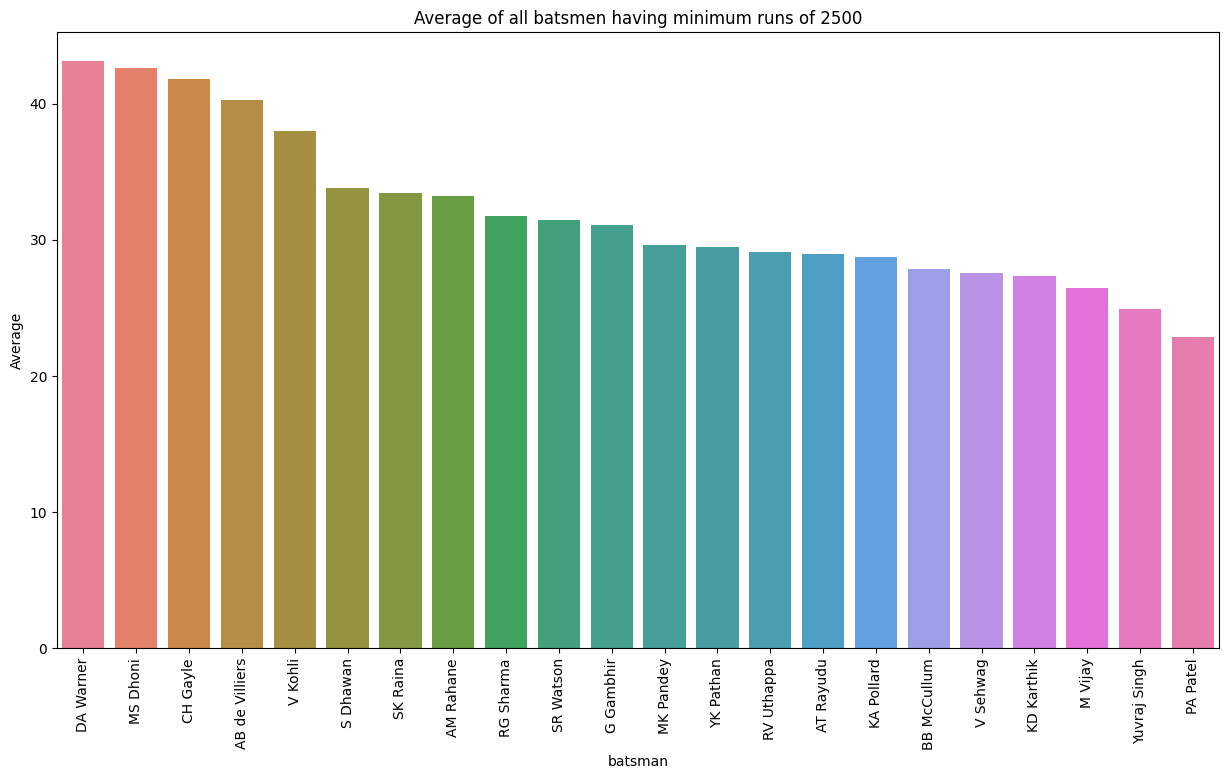